In [1]:
# project: P10
# submitter-netid: kurosu
# partner-netid: nkoo3

In [2]:
import requests, json, os
import pandas as pd
from pandas import DataFrame, Series

In [3]:
#q1
url = 'https://tyler.caraza-harter.com/cs301/spring19/data/countries.json'
r = requests.get(url)
r.raise_for_status()
data = r.text

file = pd.read_json(data)
df = pd.DataFrame(file)
df["area"].sum()

127493303

In [4]:
#q2
base_url = 'https://tyler.caraza-harter.com/cs301/spring19/data/capitals/'
r = requests.get(base_url + 'manifest.txt')
r.raise_for_status()
country_files = r.text.split('\n')
country_files[0]

'Brazil_Peru.json'

In [5]:
#q3
base_url = 'https://tyler.caraza-harter.com/cs301/spring19/data/capitals/'
r = requests.get(base_url + 'manifest.txt')
r.raise_for_status()
country_files = r.text.split('\n')


def get_json(url):
    if os.path.exists(url):
        f = open(os.path.join('./' + url[-1]), encoding = "utf-8")
        json_str = f.read()
        f.close
        data = json.loads(json_str)
        return data
    else:
        r = requests.get(url)
        r.raise_for_status
        json_str=r.text
        splitString = url.split('/')
        f = open(os.path.join(".", splitString[-1]), "w", encoding="utf-8")
        f.write(json_str)
        f.close()
        mylove = json.loads(json_str)
        return mylove
capital_rows = []

for i in country_files:
    if i[-4:] == "json":
        target = base_url + i
        myPrecious = get_json(target)
        
        for dictionary in myPrecious:
            capital_rows.append(dictionary)
capital_rows

[{'capital': 'Brasilia',
  'country': 'Brazil',
  'latitude': -15.783333333333333,
  'longitude': -47.916667},
 {'capital': 'Nouakchott',
  'country': 'Mauritania',
  'latitude': 18.066666666666666,
  'longitude': -15.966667000000001},
 {'capital': 'Bern',
  'country': 'Switzerland',
  'latitude': 46.91666666666666,
  'longitude': 7.466667},
 {'capital': 'Zagreb',
  'country': 'Croatia',
  'latitude': 45.8,
  'longitude': 16.0},
 {'capital': 'Cairo',
  'country': 'Egypt',
  'latitude': 30.05,
  'longitude': 31.25},
 {'capital': 'Sanaa',
  'country': 'Yemen',
  'latitude': 15.35,
  'longitude': 44.2},
 {'capital': 'Helsinki',
  'country': 'Finland',
  'latitude': 60.16666666666666,
  'longitude': 24.933332999999998},
 {'capital': 'Addis Ababa',
  'country': 'Ethiopia',
  'latitude': 9.033333333333333,
  'longitude': 38.7},
 {'capital': 'Prague',
  'country': 'Czech Republic',
  'latitude': 50.08333333333334,
  'longitude': 14.466667000000001},
 {'capital': 'Maseru',
  'country': 'Lesoth

In [6]:
#q4
capitals = DataFrame(capital_rows)
x = capitals.loc[capitals.country == "Bermuda", ['capital', 'country']]
x.loc[108, 'capital']

'Hamilton'

In [7]:
#q5
a = capitals.loc[capitals.capital == "Maputo", ['capital', 'country']]
a.loc[98, 'country']

'Mozambique'

In [8]:
#q6
x = capitals.sort_values(by='latitude', ascending = True)
y = []
for i in range(5):
    a = x.iloc[i,1]
    y.append(a)
y

['New Zealand', 'Australia', 'Uruguay', 'Argentina', 'Chile']

In [9]:
#q7
c = capitals.sort_values(by='latitude', ascending = False)
d = []
for i in range(3):
    b = c.iloc[i,1]
    d.append(b)
d

['Iceland', 'Finland', 'Norway']

In [10]:
#q8
df[["birth-rate", "death-rate"]].describe()

,birth-rate,death-rate
count,175.000000,175.000000
mean,22.536114,9.654971
std,11.287090,5.187216
min,8.250000,2.410000
25%,12.635000,6.075000
50%,20.340000,8.230000
75%,30.200000,11.965000
max,50.730000,29.740000


In [11]:
#q9
x = df[["literacy", "phones"]].describe()
x
#dont know how to replace yet
#convert all to string then int

,literacy,phones
count,175,175
unique,121,170
top,"99,0","2,7"
freq,11,2


In [12]:
#q10
a = df.loc[df.continent == "Europe", ['coastline', 'area', 'country']]
x = a.sort_values(by = 'coastline', ascending = True )
s = x.head(11)
s.sort_values(by = 'area', ascending = False)
s.loc[83, 'country']

'Belarus'

In [13]:
#q11
b = df.loc[df.continent == "Africa", ['coastline', 'area', 'country']]
c = b.sort_values(by = 'coastline', ascending = True )
f = c.head(14)
f.sort_values(by = 'area', ascending = False)
f.loc[174, 'country']

'Chad'

In [14]:
#q12
z = df.loc[df.continent == "South America", ['coastline', 'area', 'country']]
h = z.sort_values(by = 'coastline', ascending = True )
j = h.head(2)
j.sort_values(by = 'area', ascending = False)
j.loc[86, 'country']

'Bolivia'

In [15]:
#q13
#the latitude/longitude of Randall Stadium is 43.070231,-89.411893
#the latitude/longitude of the Wisconsin Capital is 43.074645,-89.384113

#got code from https://gist.github.com/rochacbruno/2883505
import math

lat1 = 43.070231
lon1 = -89.411893
lat2 = 43.074645
lon2 = -89.384113
radius = 3956 #miles
    
dlat = math.radians(lat2-lat1)
dlon = math.radians(lon2-lon1)
a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
    * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
d = radius * c

d

1.4338994920734274

In [16]:
#q14
x = capitals.loc[capitals.country=="India",['latitude','longitude']]
y = capitals.loc[capitals.country=="Brazil",['latitude','longitude']]

lat1 = y.loc[0, 'latitude']
lon1 = y.loc[0, 'longitude']
lat2 = x.loc[145,'latitude']
lon2 = x.loc[145, 'longitude']
radius = 3956 #miles
    
dlat = math.radians(lat2-lat1)
dlon = math.radians(lon2-lon1)
a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
    * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
d = radius * c

d

8840.574141306945

In [17]:
#q15
def distance(lat1, lon1, lat2, lon2):
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d
x = capitals.loc[capitals.country=="Chile",['latitude','longitude']] 
y = capitals.loc[capitals.country=="Guyana",['latitude','longitude']] 
z = capitals.loc[capitals.country=="Colombia",['latitude','longitude']] 
xd = distance(x.loc[120, 'latitude'],x.loc[120, 'longitude'], y.loc[41, 'latitude'], y.loc[41, 'longitude'])
yd = distance(z.loc[76, 'latitude'],z.loc[76, 'longitude'], y.loc[41, 'latitude'], y.loc[41, 'longitude'])
zd = distance(x.loc[120, 'latitude'],x.loc[120, 'longitude'], z.loc[76, 'latitude'], z.loc[76, 'longitude'])

data = [{'Guyana': xd, 'Colombia': zd}, {'Chile': zd, 'Guyana': yd}, 
        {'Chile': xd, 'Colombia': yd}]
df3 = pd.DataFrame(data, index = ['Chile','Colombia', 'Guyana'], columns = ['Chile', 'Guyana', 'Colombia'])
df3

,Chile,Guyana,Colombia
Chile,NaN,2897.553095,2636.644599
Colombia,2636.644599,1105.066312,NaN
Guyana,2897.553095,NaN,1105.066312


In [18]:
#q16
import numpy as np
columns = []
x = df.loc[df.continent == "South America", ['country']]
z1 = x['country']
for i in z1:
    columns.append(i)
columns

#write function that will return each coordinates
def finddistance(country1, country2):
    x = capitals.loc[capitals.country == country1,['latitude','longitude']]
    lat = x.iloc[0,0]
    lon = x.iloc[0,1]
    z = capitals.loc[capitals.country == country2,['latitude','longitude']]
    lat1 = z.iloc[0,0]
    lon1 = z.iloc[0,1]
    return distance(lat, lon, lat1, lon1)

def distancecountry(countrylist):
    countrydict = {}
    for country in countrylist:
        countrydict[country] = {}
        for othercountry in countrylist:
            countrydict[country][othercountry] = finddistance(country, othercountry)
    return countrydict
df12 = pd.DataFrame(distancecountry(columns))
dfnan = df12.replace(0, np.nan)
dfnan

,Chile,Guyana,Colombia,Suriname,Brazil,Bolivia,Venezuela,Argentina,Peru,Ecuador,Uruguay,Paraguay
Argentina,690.784168,2857.520462,2885.355610,2799.886429,1459.139733,1379.455702,3157.624051,NaN,1936.465790,2696.149591,143.069943,646.036442
Bolivia,1180.741903,1747.772670,1512.119255,1778.772975,1342.297074,NaN,1865.131181,1379.455702,669.926372,1326.758656,1467.253638,906.799256
Brazil,1869.737031,1709.071018,2275.516286,1572.674233,NaN,1342.297074,2228.690680,1459.139733,1967.770515,2344.584922,1412.096335,908.185709
Chile,NaN,2897.553095,2636.644599,2895.810776,1869.737031,1180.741903,3043.657689,690.784168,1531.480189,2350.207788,833.403262,963.635535
Colombia,2636.644599,1105.066312,NaN,1303.405134,2275.516286,1512.119255,639.361118,2885.355610,1167.505359,451.004119,2962.230943,2337.615967
Ecuador,2350.207788,1483.193753,451.004119,1661.699022,2344.584922,1326.758656,1088.064118,2696.149591,823.054491,NaN,2791.196721,2218.650964
Guyana,2897.553095,NaN,1105.066312,215.336336,1709.071018,1747.772670,646.969843,2857.520462,1837.860149,1483.193753,2878.638295,2214.288286
Paraguay,963.635535,2214.288286,2337.615967,2153.855447,908.185709,906.799256,2544.799572,646.036442,1558.635236,2218.650964,667.699386,NaN
Peru,1531.480189,1837.860149,1167.505359,1944.750017,1967.770515,669.926372,1705.418003,1936.465790,NaN,823.054491,2046.571589,1558.635236
Suriname,2895.810776,215.336336,1303.405134,NaN,1572.674233,1778.772975,861.456786,2799.886429,1944.750017,1661.699022,2809.744412,2153.855447


In [19]:
#q17
countrymeans = dfnan.mean()
most = countrymeans.sort_values(ascending = True)    
most.index[0]

'Bolivia'

In [20]:
#q18
least = countrymeans.sort_values(ascending = False)    
least.index[0]

'Uruguay'

In [21]:
#q19
x = dfnan.idxmin()
y = dfnan.min()
countries = []
for i in range(len(x)):
    countries.append(x[i])
countries
values = []
for i in range(len(y)):
    values.append(y[i])
values
x = np.array([countries, values])
pd.DataFrame(x.transpose(), index = columns, columns = ['nearest', 'distance'])

,nearest,distance
Chile,Argentina,690.784168202937
Guyana,Suriname,215.33633629729144
Colombia,Ecuador,451.0041190700592
Suriname,Guyana,215.33633629729144
Brazil,Paraguay,908.1857092900744
Bolivia,Peru,669.9263719404529
Venezuela,Colombia,639.3611182051043
Argentina,Uruguay,143.06994287319424
Peru,Bolivia,669.9263719404529
Ecuador,Colombia,451.0041190700592


In [22]:
#q20
farcountry = dfnan.idxmax()
fardistance = dfnan.max()
farcountries = []
for i in range(len(farcountry)):
    farcountries.append(farcountry[i])

farvalues = []
for i in range(len(fardistance)):
    farvalues.append(fardistance[i])

x = np.array([farcountries, farvalues])
pd.DataFrame(x.transpose(), index = columns, columns = ['furthest', 'distance'])

,furthest,distance
Chile,Venezuela,3043.6576894244295
Guyana,Chile,2897.5530949080326
Colombia,Uruguay,2962.2309426427582
Suriname,Chile,2895.8107758939486
Brazil,Ecuador,2344.584921697753
Bolivia,Venezuela,1865.131180946428
Venezuela,Uruguay,3207.352176106716
Argentina,Venezuela,3157.6240510697858
Peru,Uruguay,2046.571589415962
Ecuador,Uruguay,2791.1967211186234


In [23]:
import sqlite3
conn = sqlite3.connect('countries.db')
df.to_sql("countries", conn, if_exists="replace", index=False)
df.to_sql("capitals", conn, if_exists="replace", index=False)

In [24]:
#q21
query = """
SELECT continent, COUNT(continent) AS "number of countries"
FROM countries
GROUP BY continent
ORDER BY "number of countries" ASC
"""
x = pd.read_sql(query, conn)
x

,continent,number of countries
0,Australia,12
1,South America,12
2,North America,24
3,Asia,38
4,Europe,41
5,Africa,48


In [25]:
# #continents = df["continent"].value_counts()
# import matplotlib
# continents = x.set_index('continent')
# ax = continents.plot.bar(color="black")
# ax.set_xlabel("continent")
# ax.set_ylabel("number of countries")

In [26]:
#q22
#continents = df["continent"].value_counts()
import matplotlib
continents = x.set_index('continent')
ax = continents.plot.bar(color="black")
ax.set_xlabel("continent")
ax.set_ylabel("number of countries")

Text(0, 0.5, 'number of countries')

In [27]:
#q23
query = """
SELECT continent, SUM(population)/1000000. AS "total population (million)"
FROM countries
GROUP BY continent
ORDER BY "total population (million)" DESC
"""
p = pd.read_sql(query, conn)
p

,continent,total population (million)
0,Asia,3739.902863
1,Africa,824.954038
2,Europe,792.053486
3,North America,515.041558
4,South America,375.441666
5,Australia,32.163025


Text(0, 0.5, 'number of countries')

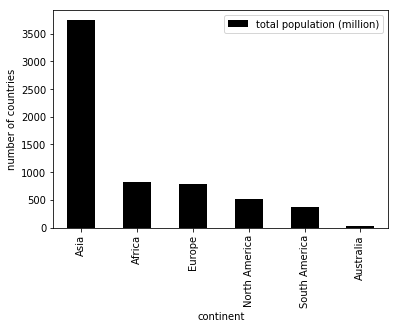

In [28]:
#q24
continents = p.set_index('continent')
ax = continents.plot.bar(color="black")
ax.set_xlabel("continent")
ax.set_ylabel("number of countries")

In [29]:
#q25
query = """
SELECT country, population
FROM countries
WHERE continent = "Australia"
GROUP BY country
ORDER BY population DESC
"""
pd.read_sql(query, conn)

,country,population
0,Australia,20264082
1,Papua New Guinea,5670544
2,New Zealand,4076140
3,Fiji,905949
4,French Polynesia,274578
5,New Caledonia,219246
6,Vanuatu,208869
7,Samoa,176908
8,Guam,171019
9,Tonga,114689


In [30]:
#q26
#real GDP = population * gdp-per-capita
query = """
SELECT country, population * "gdp-per-capita"/1000000000. AS "real_GDP (billion)"
FROM countries
ORDER BY "real_GDP (billion)" DESC
LIMIT 10
"""
gdp = pd.read_sql(query, conn)
gdp

,country,real_GDP (billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690
8,Brazil,1429.394525
9,Russia,1271.752506


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0BF20890>],
      dtype=object)

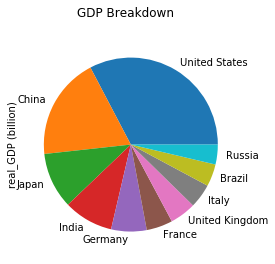

In [31]:
#q27
temp = gdp['real_GDP (billion)']
temp.index = gdp["country"]
temp.plot.pie(title="GDP Breakdown", subplots=True)

In [32]:
#q28
#Gap is defined as the difference between birth-rate and death-rate
query = """
SELECT country, `birth-rate`, `death-rate`
FROM countries
GROUP BY country
ORDER BY `birth-rate`-`death-rate` DESC
LIMIT 10
"""
g = pd.read_sql(query, conn)
g

,country,birth-rate,death-rate
0,Uganda,47.35,12.24
1,Yemen,42.89,8.30
2,Mali,49.82,16.89
3,Oman,36.24,3.81
4,Madagascar,41.41,11.11
5,Burkina Faso,45.62,15.60
6,Niger,50.73,20.91
7,Chad,45.73,16.38
8,Mauritania,40.99,12.16
9,Burundi,42.22,13.46


Text(0, 0.5, 'country')

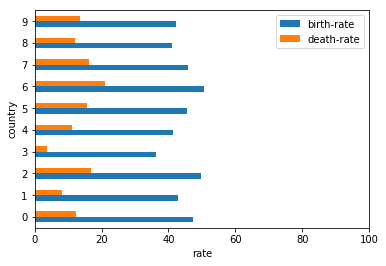

In [33]:
#q29
count = df['country'].str.upper().value_counts()
ax = g.plot.barh(xlim= (0,100))
ax.set_xlabel("rate")
ax.set_ylabel("country")

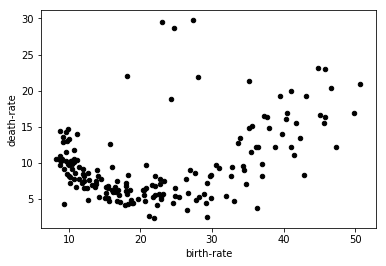

In [34]:
#q30
df.plot.scatter(x = "birth-rate", y = "death-rate", c = "black")

In [35]:
#q31
query = """
SELECT country, `birth-rate`, `death-rate`
FROM countries
WHERE ((`birth-rate` > 15) & (`birth-rate` < 32) & (`death-rate` > 17) & (`death-rate` < 30))
GROUP BY country
ORDER BY `birth-rate` ASC
LIMIT 6
"""
o = pd.read_sql(query, conn)
o

,country,birth-rate,death-rate
0,South Africa,18.20,22.00
1,Botswana,23.08,29.50
2,Namibia,24.32,18.86
3,Lesotho,24.75,28.71
4,Swaziland,27.41,29.74
5,Zimbabwe,28.01,21.84


In [36]:
#q32
correlation = df.corr()
correlation.iloc[1,3]

0.40037782919521714

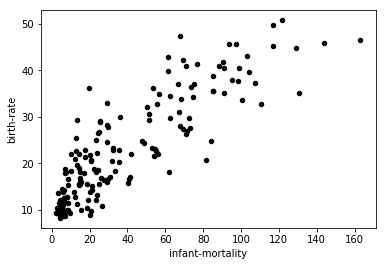

In [37]:
#q33
df.plot.scatter(x = "infant-mortality", y = "birth-rate", c = "black")

In [38]:
#q34
correlation = df.corr()
correlation.iloc[5,1]

0.8687265678031416

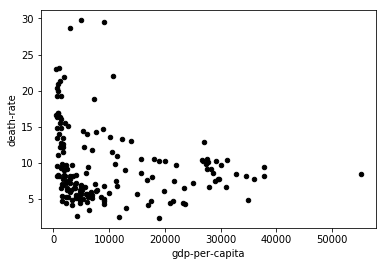

In [39]:
#q35
df.plot.scatter(x = "gdp-per-capita", y = "death-rate", c = "black")

In [40]:
#q36
correlation = df.corr()
correlation.iloc[4,3]

-0.20995846867456752

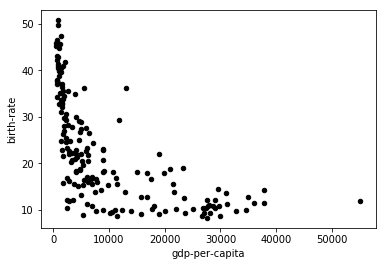

In [41]:
#q37
df.plot.scatter(x = "gdp-per-capita", y = "birth-rate", c = "black")

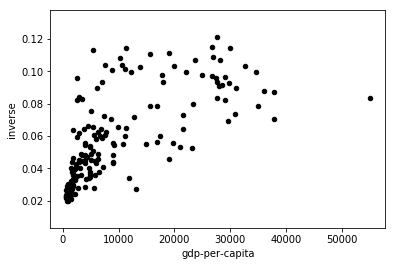

In [42]:
#q38
#inverse birth rate is defined as 1 / birth-rate
df["inverse"] = 1 / df["birth-rate"]
i = df.plot.scatter(x = "gdp-per-capita", y = "inverse", c = "black")

In [43]:
#q39
df["1"] = 1
res = np.linalg.lstsq(df[["gdp-per-capita", "1"]], df["inverse"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n:
m = coefficients[0] # slope
n = coefficients[1] # intercept

t = (m, n)
t[:]

(1.8422394400496387e-06, 0.039035043649535375)

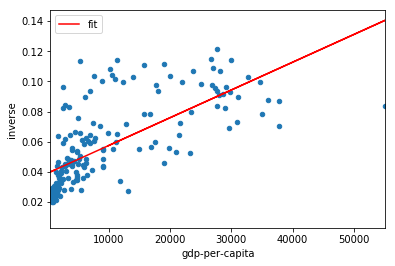

In [44]:
#q40
coefficients = res[0] # coefficients is (m,n:
m = coefficients[0] # slope
n = coefficients[1] # intercept
ax = df.plot.scatter(x='gdp-per-capita', y='inverse')

df["fit"] = df["gdp-per-capita"] * m + n
df.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)